In [1]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.integrate as sci

In [2]:
def func(t,y):
    # The right-hand side for the 2D gravity ODE
    dy = np.zeros((4,))
    dy[0] = y[2]
    dy[1] = y[3]
    aux = y[0]*y[0]+y[1]*y[1]
    dy[2] = -y[0]/aux
    dy[3] = -y[1]/aux
    return dy

# initial condition for the unit circle solution
y0 = np.array([1,0,0,1])

# for the exact solution
tt = np.linspace(0,2*np.pi,200)

# parameters
Nloops = 4
tmax = Nloops*2*np.pi
steps_per_loop = 200
Nt = Nloops*steps_per_loop
dt = 2*np.pi/steps_per_loop


In [3]:
# Attempt 1: forward Euler method
sol = np.zeros((Nt+1,4))
sol[0,:] = y0
t = 0
for j in range(Nt):
    sol[j+1,:] = sol[j,:] + dt*func(t,sol[j,:])
    t = t + dt

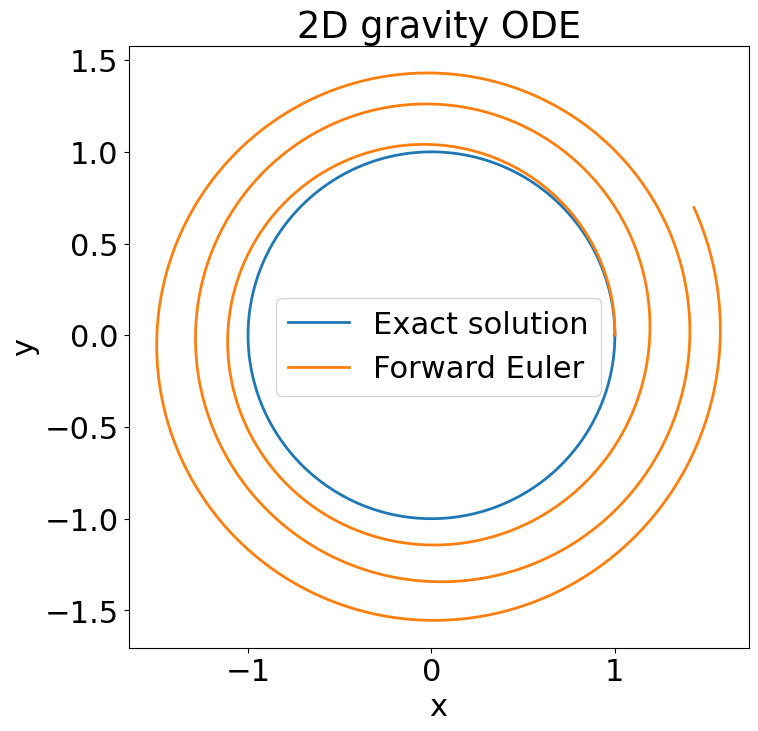

In [4]:
# https://matplotlib.org/stable/tutorials/introductory/quick_start.html#sphx-glr-tutorials-introductory-quick-start-py
# plot the exact and computed solution
plt.rcParams.update({'font.size': 22})
fig, ax = plt.subplots(figsize=(8,8))
plt.plot(np.cos(tt),np.sin(tt),linewidth=2,label='Exact solution')
plt.plot(sol[:,0],sol[:,1],linewidth=2,label='Forward Euler')  
plt.title("2D gravity ODE")
plt.legend()
plt.xlabel("x")
plt.ylabel("y")
ax.set_aspect(1)

In [6]:
# Attempt 2: RK4

def RKstep(t,y,RHS,dt):
    dt2 = 0.5*dt
    k1 = RHS(t,y)
    k2 = RHS(t+dt2,y+dt2*k1)
    k3 = RHS(t+dt2,y+dt2*k2)
    k4 = RHS(t+dt,y+dt*k3)
    ynew = y + dt*(k1 + 2*(k2+k3) + k4)/6
    return ynew

sol = np.zeros((Nt+1,4))
sol[0,:] = y0
t = 0
for j in range(Nt):
    sol[j+1,:] = RKstep(t,sol[j,:],func,dt)
    t = t + dt
        

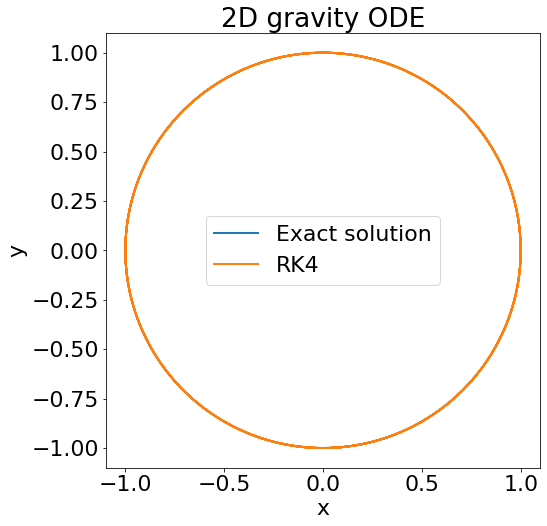

In [7]:
# plot the exact solution and the training points
fig, ax = plt.subplots(figsize=(8,8))
plt.plot(np.cos(tt),np.sin(tt),linewidth=2,label='Exact solution')
plt.plot(sol[:,0],sol[:,1],linewidth=2,label='RK4')  
plt.title("2D gravity ODE")
plt.legend()
plt.xlabel("x")
plt.ylabel("y")
ax.set_aspect(1)

(4, 34)
[[ 1.00000000e+00  9.99999501e-01  9.99939621e-01  9.93858100e-01
   7.28816156e-01 -1.27748380e-01 -8.36810126e-01 -9.24450592e-01
  -3.34478973e-01  5.25272319e-01  9.75911640e-01  7.06094801e-01
  -1.09587152e-01 -8.14317431e-01 -9.14168755e-01 -3.51419661e-01
   4.97313014e-01  9.48550582e-01  6.95486459e-01 -9.08858379e-02
  -7.88055566e-01 -9.01795796e-01 -3.52500447e-01  4.79974737e-01
   9.30255237e-01  6.99322045e-01 -6.78662392e-02 -7.61807022e-01
  -8.84017076e-01 -3.58475025e-01  4.55331523e-01  9.06483583e-01
   6.90455636e-01  4.10830080e-01]
 [ 0.00000000e+00  9.99000833e-04  1.09887898e-02  1.10661995e-01
   6.84641282e-01  9.90719470e-01  5.34992561e-01 -3.44783667e-01
  -9.25506164e-01 -8.33499351e-01 -1.28380437e-01  6.78077610e-01
   9.66379822e-01  5.26639846e-01 -3.25607045e-01 -9.03336763e-01
  -8.26412542e-01 -1.39430467e-01  6.56180530e-01  9.52131810e-01
   5.39215848e-01 -2.98381974e-01 -8.76139575e-01 -8.10948110e-01
  -1.51721164e-01  6.29818469e-01

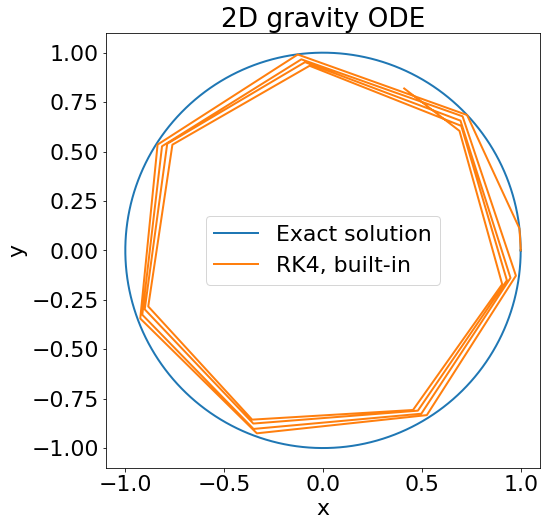

In [9]:
# Attempt 3: use the standard solver RK45 with default settings 
# https://docs.scipy.org/doc/scipy/reference/generated/scipy.integrate.solve_ivp.html
sol1 = sci.solve_ivp(func,[0,tmax],y0,method = 'RK45')
print(np.shape(sol1.y))
print(sol1.y)
ysol1 = sol1.y
# plot the exact solution and the training points
fig, ax = plt.subplots(figsize=(8,8))
plt.plot(np.cos(tt),np.sin(tt),linewidth=2,label='Exact solution')
plt.plot(ysol1[0,:],ysol1[1,:],linewidth=2,label='RK4, built-in')  
plt.title("2D gravity ODE")
plt.legend()
plt.xlabel("x")
plt.ylabel("y")
ax.set_aspect(1)

(4, 1495)


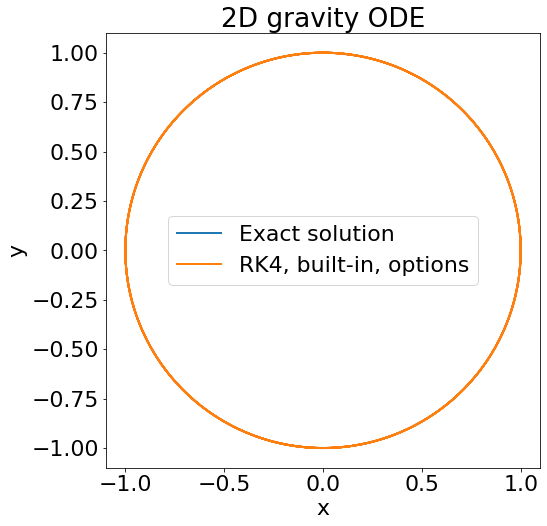

In [11]:
# Attempt 4: use the standard solver RK45 with advanced settings 
# https://docs.scipy.org/doc/scipy/reference/generated/scipy.integrate.solve_ivp.html
sol2 = sci.solve_ivp(func,[0,tmax],y0,method = 'RK45',atol = 1e-12, rtol=1e-12)
print(np.shape(sol2.y))
ysol2 = sol2.y
# plot the exact solution and the training points
fig, ax = plt.subplots(figsize=(8,8))
plt.plot(np.cos(tt),np.sin(tt),linewidth=2,label='Exact solution')
plt.plot(ysol2[0,:],ysol2[1,:],linewidth=2,label='RK4, built-in, options')  
plt.title("2D gravity ODE")
plt.legend()
plt.xlabel("x")
plt.ylabel("y")
ax.set_aspect(1)

(4, 149242)


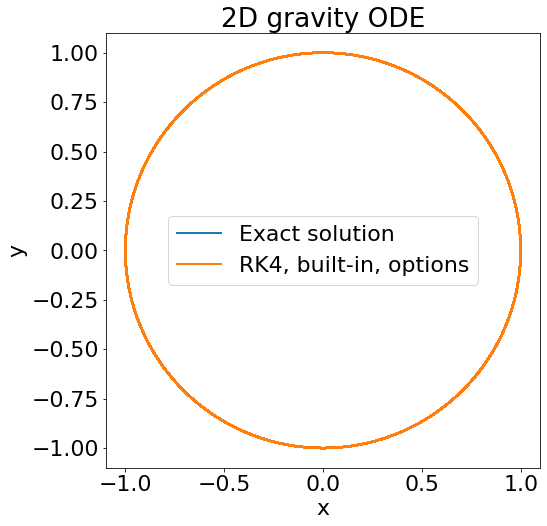

In [12]:
# Attempt 4: use the standard solver RK45 with default settings 
# https://docs.scipy.org/doc/scipy/reference/generated/scipy.integrate.solve_ivp.html
sol2 = sci.solve_ivp(func,[0,tmax*100],y0,method = 'RK45',atol = 1e-12, rtol=1e-12)
print(np.shape(sol2.y))
ysol2 = sol2.y
# plot the exact solution and the training points
fig, ax = plt.subplots(figsize=(8,8))
plt.plot(np.cos(tt),np.sin(tt),linewidth=2,label='Exact solution')
plt.plot(ysol2[0,:],ysol2[1,:],linewidth=2,label='RK4, built-in, options')  
plt.title("2D gravity ODE")
plt.legend()
plt.xlabel("x")
plt.ylabel("y")
ax.set_aspect(1)